## 1. load package

In [1]:
library(fgsea)
library(data.table)
library(ggplot2)
library(readxl)
# library(cmapR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 2. load data

In [2]:
file_path <- "/lustre1/project/stg_00079/students/tingting/database/metadata/newnicomarkers.csv"
nicol_genes <- read.csv(file_path)

In [213]:
head(nicol_genes)

,cluster,gene,avg_log2FC,p_val,p_val_adj,pct.1,pct.2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Homeostatic (HM),P2RY12,0.6988092,0,0,0.983,0.880
2,Homeostatic (HM),CX3CR1,0.6652931,0,0,0.992,0.934
3,Homeostatic (HM),P2RY13,0.5685809,0,0,0.976,0.900
4,Homeostatic (HM),MAF,0.5425504,0,0,0.944,0.847
5,Homeostatic (HM),LYVE1,0.5361840,0,0,0.392,0.252
6,Homeostatic (HM),CST3,0.5142341,0,0,0.992,0.958


## 3. Nicol first 100 genes

In [4]:
cluster_gene_list <- split(nicol_genes$gene, nicol_genes$cluster)

In [17]:
cluster_200_gene_list <- lapply(cluster_gene_list, function(x) head(x, 200))

## 4. sun states marker genes

In [3]:
sun_markers<-read_xlsx("/lustre1/project/stg_00079/students/tingting/data/sun/supplementary_data/SupplementalTables.combined.xlsx", sheet = 3)

In [8]:
head(sun_markers)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,microgliaState,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,0.7135225,0.737,0.457,0,MG0,RASGEF1C
0,0.6878487,0.354,0.169,0,MG0,PRDM11
0,0.6869559,0.819,0.536,0,MG0,P2RY12
0,0.6140870,0.573,0.433,0,MG0,GRID2
0,0.5892958,0.894,0.687,0,MG0,SYNDIG1
0,0.5795445,0.717,0.499,0,MG0,KHDRBS3


In [11]:
max(sun_markers$p_val_adj)

[1] 1

In [9]:
table(sun_markers$microgliaState)


 MG0  MG1 MG10 MG11 MG12  MG2  MG3  MG4  MG5  MG6  MG7  MG8 
  89   41  239   73  365  181  148  179  179  241  360  133 

In [12]:
dim(sun_markers)

[1] 2228    7

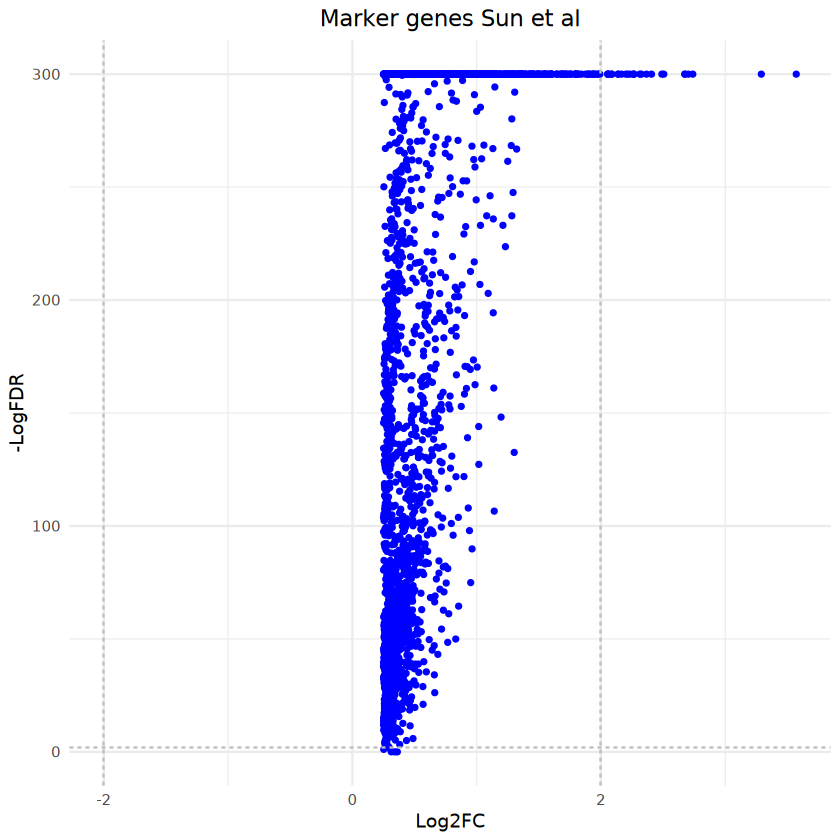

In [8]:
ggplot(sun_markers, aes(x = avg_log2FC, y = -log10(p_val_adj+1e-300))) +
  geom_point(size = 1, color = "blue") +
  geom_vline(xintercept = c(-2, 2), color = "grey", linetype = "dashed") +
  geom_hline(yintercept = 2, color = "grey", linetype = "dashed") +
  labs(
    x = "Log2FC",
    y = "-LogFDR",
    title = "Marker genes Sun et al"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5)
  )

ERROR: Error in parse(text = x, srcfile = src): <text>:1:67: unexpected symbol
1: plt.scatter(x=sun_markers['avg_log2FC'],y=sun_markers['p_val_adj'].apply
                                                                      ^


In [4]:
# cluster_200_gene_list has no exact meaning, this is just to run eaier without changing parameters afterwards
cluster_200_gene_list <- split(sun_markers$gene, sun_markers$microgliaState)

## in-house marker genes

In [210]:
parse_grp <- function(file_path) {
  if (!file.exists(file_path)) {
    stop("The specified file does not exist.")
  }
  
  # Read the .grp file into a character vector
  values <- readLines(file_path)
  
  # Extract the file name without extension to use as the list name
  file_name <- tools::file_path_sans_ext(basename(file_path))
  
  # Create a named list with the file name as the list element name
  result <- list(values)
  names(result) <- file_name
  
  return(result)
}

# Example usage
grp_path <- "/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_Black.grp"
values_list <- parse_grp(grp_path)
str(values_list)

Warning message in readLines(file_path):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_Black.grp'”


List of 1
 $ micmod_Black: chr [1:45] "ARL4A" "BTG2" "CCL3" "CCNL1" ...
 [1] "ARL4A"    "BTG2"     "CCL3"     "CCNL1"    "CEBPD"    "CH25H"   
 [7] "DNAJB1"   "DUSP1"    "DYSF"     "EGR1"     "EGR2"     "EGR3"    
[13] "FFAR3"    "FOS"      "FOSB"     "FOSL2"    "GADD45B"  "GPR42"   
[19] "GRASP"    "H3F3B"    "HES1"     "HSPA1A"   "HSPA1B"   "IER2"    
[25] "IER3"     "JUN"      "JUNB"     "KLF6"     "MCL1"     "MIDN"    
[31] "NEAT1"    "NFKBID"   "NR4A1"    "NR4A2"    "OSM"      "PMAIP1"  
[37] "PPP1R15A" "PTGS2"    "RGS1"     "RGS16"    "SGK1"     "SLC16A3" 
[43] "SLC31A2"  "TNFSF9"   "ZFP36"   


In [212]:
library(tools)

parse_grp_files <- function(directory) {
  # Get the list of .grp files in the specified directory
  files <- list.files(directory, pattern = "\\.grp$", full.names = TRUE)
  
  # Initialize an empty list to store the contents
  grp_list <- list()
  
  # Iterate over each file and read its contents
  for (file in files) {
    # Extract the file name without extension to use as the list element name
    file_name <- file_path_sans_ext(basename(file))
    
    # Read the .grp file into a character vector
    values <- readLines(file)
    
    # Store the values in the list with the file name as the list element name
    grp_list[[file_name]] <- values
  }
  
  return(grp_list)
}

# Example usage
directory <- "/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules"
grp_files_contents <- parse_grp_files(directory)

# Print the structure of the resulting list
str(grp_files_contents)


Warning message in readLines(file):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_Black.grp'”
Warning message in readLines(file):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_Brown.grp'”
Warning message in readLines(file):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_Coral.grp'”
Warning message in readLines(file):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_Crimson.grp'”
Warning message in readLines(file):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModules/micmod_DarkViolet.grp'”
Warning message in readLines(file):
“incomplete final line found on '/data/leuven/351/vsc35107/lustre1_stt/data/sun/snap2_allfragments/08/MarkModule

List of 17
 $ micmod_Black     : chr [1:45] "ARL4A" "BTG2" "CCL3" "CCNL1" ...
 $ micmod_Brown     : chr [1:57] "ACP5" "ACTN1" "ANXA2" "AP1S2" ...
 $ micmod_Coral     : chr [1:314] "ABRACL" "AFTPH" "AGPAT2" "ALKBH7" ...
 $ micmod_Crimson   : chr [1:185] "A1BG-AS1" "ABCB4" "ACO1" "ADA" ...
 $ micmod_DarkViolet: chr [1:1545] "A1BG" "AAED1" "ABCB10" "ABCC13" ...
 $ micmod_DodgerBlue: chr [1:638] "ABHD18" "AC004447.2" "AC006129.2" "AC006129.4" ...
 $ micmod_Fuchsia   : chr [1:36] "AAK1" "CISD1" "KDM4A-AS1" "LINC00662" ...
 $ micmod_Gold      : chr [1:1707] "A2M" "AAAS" "ABCC5" "ABCD1" ...
 $ micmod_Gray      : chr [1:49] "ADARB1" "ADM" "ANTXR2" "ARRDC3" ...
 $ micmod_HotPink   : chr [1:73] "ADAR" "AGRN" "APOL6" "BATF2" ...
 $ micmod_LimeGreen : chr [1:3067] "AADACL2-AS1" "AARS" "AARSD1" "AATF" ...
 $ micmod_Navy      : chr [1:80] "AAMDC" "ABCE1" "ABCF1" "ABHD11" ...
 $ micmod_OliveDrab : chr [1:281] "ABHD12" "AC005523.2" "ACSS2" "ACYP2" ...
 $ micmod_Orchid    : chr [1:210] "ABHD14A" "AC007

## 4. GSEA analysis
https://biostatsquid.com/fgsea-tutorial-gsea/

### ranking metric.

This way, the magnitude of the ranking will be given by the p value (since I use -log10(), the more significant a gene is differentially expressed, the larger that value will be). The sign of the ranking (positive or negative) will be given by the fold-change: upregulated genes will have positive rankings, downregulated genes will have negative rankings.

In [394]:
# df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/090gsea/DAG_cell_types/0.csv', sep=',', head=TRUE)
df<-read.table('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/data/DAGs/0.csv', sep=',', head=TRUE)


In [395]:
head(df)

,X,Log2FC,Adjusted_pval,Contrast
,<chr>,<dbl>,<dbl>,<int>
1,NPIPB6,2.427118,8.725255e-01,0
2,EIF3CL,2.427118,8.725255e-01,0
3,KRTAP9-7,1.747022,0.000000e+00,0
4,TNXB,1.374449,4.681686e-19,0
5,GKN1,1.325519,1.082568e-30,0
6,GKN2,1.325519,1.082568e-30,0


In [396]:
dim(df)

[1] 17286     4

In [397]:
rankings <- sign(df$Log2FC)*(-log10(df$Adjusted_pval)) # we will use the signed p values from spatial DGE as ranking
names(rankings) <- df$X # genes as names#

In [398]:
head(rankings)

NPIPB6      EIF3CL    KRTAP9-7        TNXB        GKN1        GKN2 
 0.05922185  0.05922185         Inf 18.32959772 29.96554483 29.96554483

In [399]:
rankings <- sort(rankings, decreasing = TRUE)

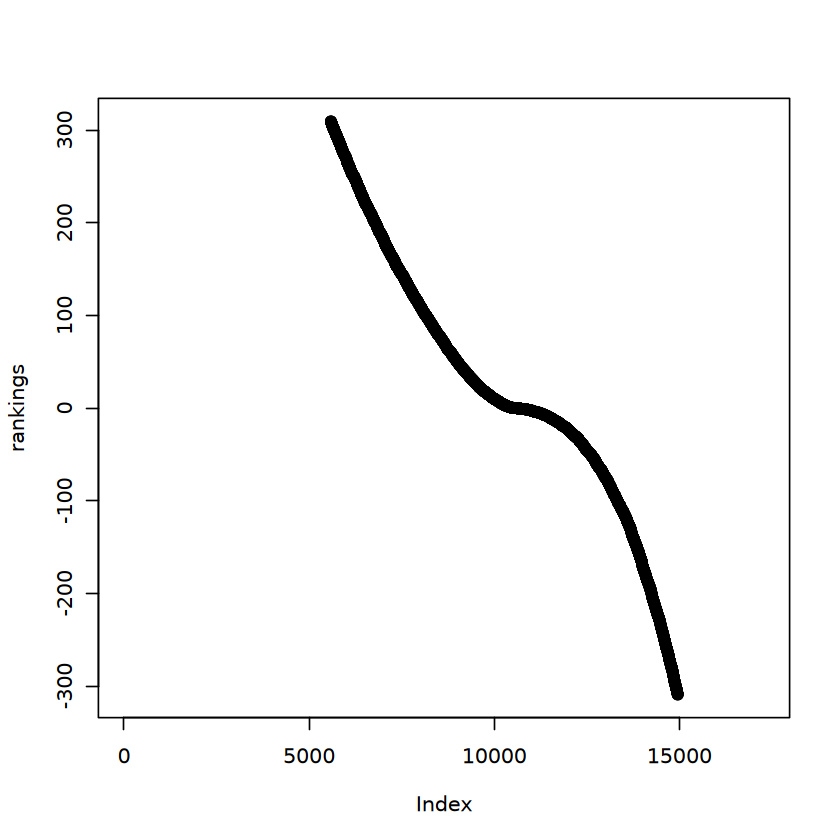

In [400]:
plot(rankings)

In [401]:
max(rankings)

[1] Inf

In [402]:
min(rankings)

[1] -Inf

In [403]:
# Some genes have such low p values that the signed pval is +- inf, we need to change it to the maximum * constant to avoid problems with fgsea
max_ranking <- max(rankings[is.finite(rankings)])
min_ranking <- min(rankings[is.finite(rankings)])
rankings <- replace(rankings, rankings > max_ranking, max_ranking * 10)
rankings <- replace(rankings, rankings < min_ranking, min_ranking * 10)
rankings <- sort(rankings, decreasing = TRUE) # sort genes by ranking

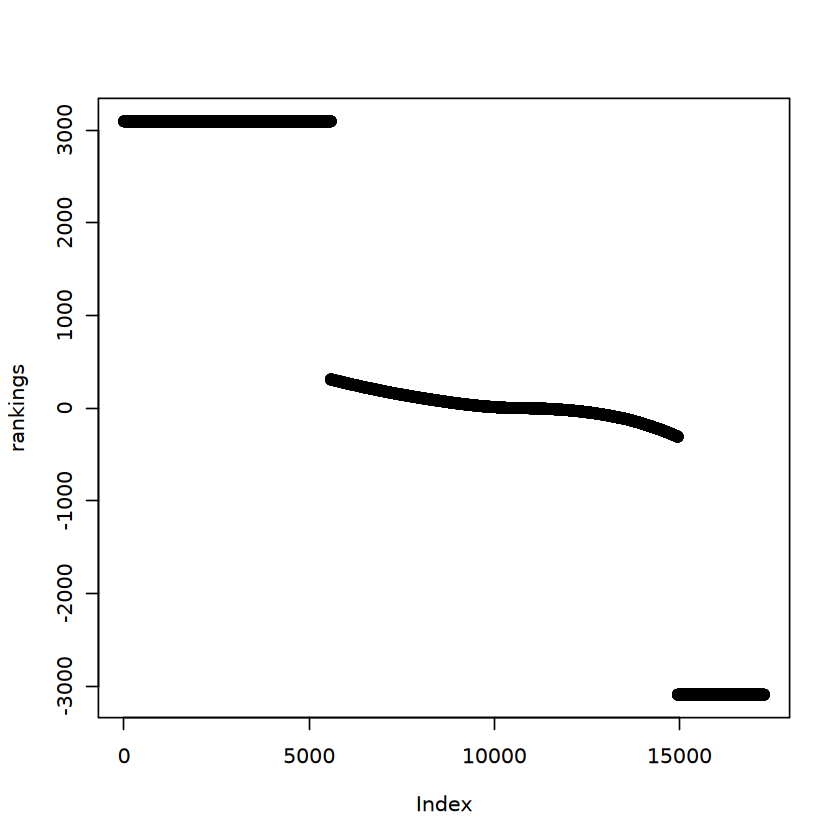

In [404]:
plot(rankings)

In [405]:
max(rankings)
min(rankings)

[1] 3094.024

[1] -3093.519

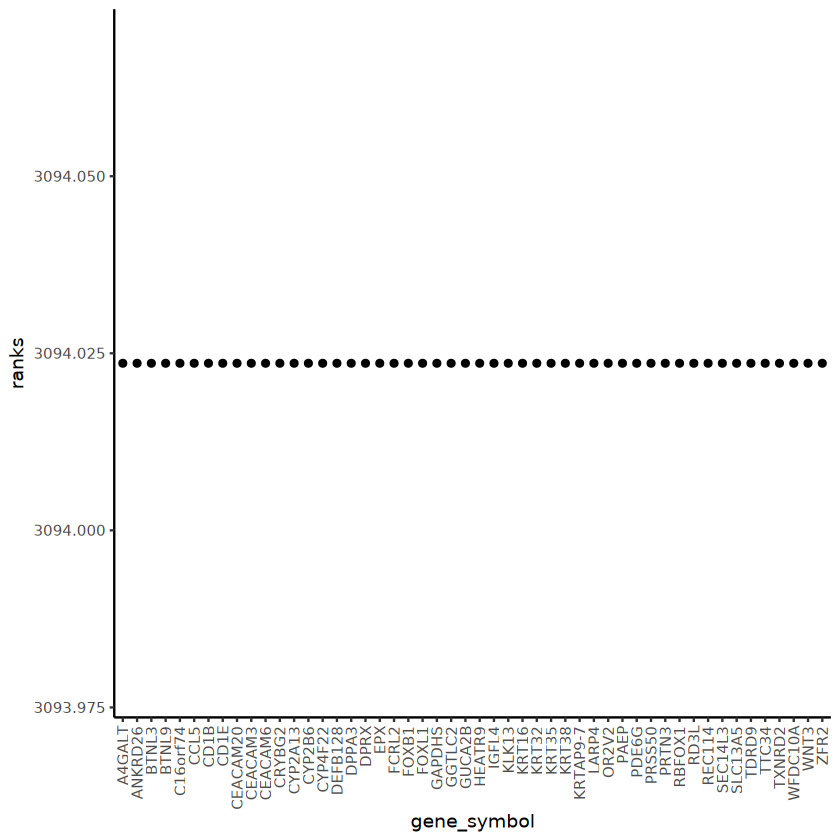

In [406]:
ggplot(data.frame(gene_symbol = names(rankings)[1:50], ranks = rankings[1:50]), aes(gene_symbol, ranks)) + 
	geom_point() +
	theme_classic() + 
	theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

### Run gsea

In [407]:
#  pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values
GSEAres <- fgsea(pathways = grp_files_contents, # List of gene sets to check
                 stats = rankings,
                 nPermSimple = 100000,
                 scoreType = 'std', # in this case we have both pos and neg rankings. if only pos or neg, set to 'pos', 'neg'
                 minSize = 10,
                 maxSize = 500,
                 nproc = 1) 

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (46.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


  |======================================================================| 100%



In [408]:
GSEAres

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
micmod_Black,8.562830e-01,0.922150968,0.0027256628,0.3185080,0.7848205,42,"CCL3 , FFAR3 , FOSL2 , TNFSF9 , OSM , NFKBID , SLC16A3 , SLC31A2 , RGS16 , NR4A1 , PPP1R15A, ZFP36"
micmod_Brown,6.152414e-02,0.172267581,0.0190625298,0.5160411,1.3005544,51,"ANXA2 , TREM1 , SIGLEC10, CCRL2 , LGALS1 , C1QA , ACP5 , LITAF , MAPK13 , C3 , TMOD2 , MPP1 , SEMA4D , CCND1 , FCGR3A , S100A10 , USP2 , TLR10 , CD4 , HMOX1 , CTSL , CDC42EP3, RASL10A , INF2 , COLEC12 , ACTN1"
micmod_Coral,4.132138e-01,0.642776963,0.0054562592,0.3681897,1.0239225,291,"ANKRD26 , TSPO , COX6B1 , ANKFY1 , NDUFB7 , PCBD1 , ARHGAP27, RPL36 , MRPL41 , FES , CCDC124 , RPL38 , NDUFS5 , RPS28 , SLC12A9 , EIF3G , GSTP1 , COMMD4 , EDF1 , UQCR10 , SRP14 , NTAN1 , ROMO1 , RPL18A , SH3BGRL3, COX4I1 , UBL5 , FAU , SERF2 , LPIN1 , FBXO46 , BCL7C , TRAPPC2L, AGPAT2 , TALDO1 , SNRNP25 , DYNLRB1 , CHCHD10 , RPS3 , CALM3 , COPRS , C19orf53, CRK , C1orf162, FGD2 , IL10RA , JOSD2 , DDI2 , SUMO3 , KIAA0753, OLFML2B , CIB1 , RBX1 , COX5A , GPSM3 , SEC11A , HCST , MAN2B2 , FUOM , FMNL1 , S100A11 , ALKBH7 , GSTO1 , RPL3 , NSD1 , FCER1G , PTRHD1 , RPL22 , PPDPF , MLLT6 , NDUFA3 , ZNF16 , APRT , PIAS3 , MLH3 , RPL37A , IFI27L2 , CD59 , OST4 , EIF4EBP1, C2CD2 , RPL35 , SKP1 , RPS27 , TRMT44 , ZNF708 , HMGA1 , VEGFB , NDUFA8 , SCD , PTMS , UFC1"
micmod_Crimson,9.941712e-01,0.994171183,0.0007716089,0.2618868,0.7177625,163,"ZNF69 , AURKC , CYP2S1 , CLEC17A , CLEC11A , APOBR , PTPN7 , TPM4 , RETN , SLC17A9 , LILRA1 , CD1D , RCAN3 , CIITA , CDCP1 , C5AR1 , SECTM1 , ZNF813 , JUP , PTAFR , PRR5 , ZSCAN29 , PIGM , MYO1C , ADA , DPCD , ZNF561 , ZNF808 , UACA , FAS , ZBTB34 , SPATC1L , PDGFB , NRARP , NQO1 , ZNF585B , VPS33B , UCKL1 , NRIP3 , POLD3 , DZIP1L , LAG3 , ASB1 , STX17 , GADD45G , RPL39L , NDC1 , DND1 , RCAN1 , STX2 , WDR5B , CYB561D1, NOTCH4"
micmod_DarkViolet,3.538528e-01,0.619242351,0.0061672127,0.3695833,1.0332651,445,"ZNF264 , SGSM3 , ZNF525 , PGGHG , SMIM3 , NOTCH2NLA , RNASEH2A , PAXX , WASHC1 , ARPIN , ZPR1 , ST6GALNAC2 , ELOA , CIAO3 , ZNF557 , MMP24OS , OSBPL7 , NECTIN2 , SPATA20 , CHTF8 , COQ8B , TLE5 , SPINDOC , MAD1L1 , COPS9 , GDPGP1 , SPACA6 , SLC49A3 , NDUFA7 , PLAAT4 , ABRAXAS2 , HM13 , ELOB , GRK3 , SIRT6 , PTCH2 , DMAC2 , EEF1AKMT2 , ZNF320 , GRK2 , JPT2 , SUGP1 , SPNS2 , CCPG1 , CPD , YIPF2 , TMEM121B , FDX2 , NUSAP1 , NOP2 , INAFM2 , ECPAS , CBL , SELENON , RAMAC , LRMDA , SELENOM , PNRC2 , REX1BD , INAFM1 , TKFC , B4GAT1 , MCRIP2 , NAXE , ILRUN , ENTR1 , RSKR , TASOR , ST6GALNAC6 , TRIR , RCC1L , CYBC1 , CLN3 , TIMM29 , PIGBOS1 , CD68 , IRF8 , RNF213 , MRPL58 , METTL26 , PCNX2 , NOP53 , PRXL2C , NCBP2AS2 , NICN1 , NSD2 , ALDOA , PLAAT3 , CIAO2B , MAP3K12 , MRC2 , RNF126 , VSIR , KMT2A , TENT4B , MRTFB , RETREG3 , SELENOW , STRADA , TAP2 , GTF2I , CENPH , UTP11 , A1BG , ZNF875 , ADGRD1 , RTF2 , JDP2 , TSFM , CZIB , OAS1 , HDHD5 , NKAPD1 , IFT22 , IL10RB , RBAK-RBAKDN, ADA2 , UTP25 , RIPOR1 , RRAGC , MGAT1 , PRXL2A , N4BP1 , ZNF737 , GON7 , ESS2 , ABCB10 , GATD1 , PCNX1 , RIOX1 , SHLD1"
micmod_DodgerBlue,6.114349e-01,0.778189839,0.0036915625,0.3493665,0.9647733,206,"UTP4 , ADGRE2 , SPPL2B , ZNF551 , CLEC19A, CCL4L2 , HACD3 , PLPPR2 , GIMAP5 , PECAM1 , ZNF761 , ADGRG1 , NCBP3 , BBOF1 , CCL3L3 , MTERF4 , ADGRE5 , GLMP , NOL12 , TSPAN10, NAA60 , PRR15 , ADGRG5 , WDR83OS, SGF29 , GCN1 , LRRC75A, FAM234A, PLBD2 , MYDGF , PWP2 , FAAP20 , SVBP , PDP2 , AZIN2 , TRIM56 , DEPDC5 , NRDC , RAB29 , PCYOX1L, MAP3K14, EGLN2 , ZNF316 , EMSY , IGFLR1 , NAPRT , ST3GAL3, RNASE2 , KHNYN , BOP1 , FAM89A , MAVS , MFSD13A, GDF11"
micmod_Fuchsia,7.996972e-01,0.922150968,0.0035073564,0.3594486,0.7890697,20,"RAD9A , TNFRSF1A, RPL4 , ZNF431 , AAK1 , RPL27A"
micmod_Gray,4.011557e-02,0.140404480,0.0239607644,0.5409952,1.3508479,47,"F13A1 , OSCAR , CD209 , LILRA5 , CCR7 , ADARB1 , QSOX2 , TGFBI , CD163 , PLXNA1 , IGFBP4 , DUSP3 , TNFAIP8L1, METRNL , PGD , LSS , ADM , FAM110A , DOK2 , MARCO , STARD8"
micmod

In [409]:
# How many significant pathways did we get?
# correcting for multiple testing, we have no significant pathways (p-adjusted values < 0.05
sum(GSEAres[, padj < 0.05])

[1] 2

In [410]:
GSEAres[GSEAres[, padj < 0.05]]

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
micmod_HotPink,6.081059e-03,0.042567412,0.06109649,0.5538154,1.441168,70,"IFITM3 , USP18 , IFI35 , TRIM14 , BATF2 , APOL6 , XAF1 , LY6E , HELZ2 , OASL , OAS2 , DHX58 , OAS3 , ADAR , IFITM1 , IFI6 , SLFN5 , CLEC4E , PARP10 , PML , MX2 , ISG15 , EIF2AK2, TOR1B , UBE2L6 , MX1 , AGRN , ISG20 , MT2A , IFIT5 , SP110 , PARP14 , HESX1"
micmod_Teal,3.181464e-05,0.000445405,0.55733224,0.6201696,1.633484,81,"NUPR1 , S100A4 , SLPI , CD37 , FXYD5 , AXL , CALHM2 , APOE , HLA-DQA2, S100A6 , CD151 , PDPN , APOC1 , KLHDC8B , HAGHL , MFGE8 , VAT1 , PDLIM7 , RAB42 , SMAGP , ITGAX , HLA-DQA1, CD9 , HSD17B14, CFD , SDSL , HLA-DRB5, LILRA4 , PEPD , TNFRSF14, HLA-DOA , WIPF3 , HLA-DPA1, RAMP1 , HLA-DRA , HLA-DRB1, HLA-DQB1, PTCRA , FABP3 , MYOZ1 , NFIL3 , LYVE1 , LGALS9 , TMEM37 , HLA-DPB1, GRN , PKD2L1 , NAGLU , LIPA , GAS6 , CHIT1"


In [411]:
# ggplot(GSEAres[GSEAres[, padj < 0.05]], aes(x = reorder(pathway, NES), y = NES, fill = NES > 0)) +
#   geom_bar(stat = "identity") +
#   coord_flip() +
#   scale_fill_manual(values = c("blue", "orange")) +
#   labs(title = "NES", x = "Pathway with adj-pval<0.05", y = "NES") +
#   theme_minimal() +
#   theme(legend.position = "none")
png('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/Analysis_fisher_functional/images/0_nes_mm_cell_states.png', width = 600, height = 600)
ggplot(GSEAres[GSEAres[, padj < 0.05]], aes(x = reorder(pathway, NES), y = NES, fill = NES > 0)) +
  geom_bar(stat = "identity", alpha = 0.8, width = 0.4) +
  coord_flip() +
    scale_fill_manual(
    name = "NES", 
    values = c("TRUE" = "red", "FALSE" = "blue"),
    labels = c("Positive", "Negative")
  ) +
  labs(title = "NES cluster0", x = "Pathway with adj-pval < 0.05", y = "NES") +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text.x = element_text(size = 12), # Increase x-axis text size
    axis.text.y = element_text(size = 12), # Increase y-axis text size
    plot.title = element_text(size = 14, face = "bold"), # Increase title size
    plot.margin = margin(10, 10, 10, 20) # Adjust margins
  )
dev.off()

png 
  2

In [412]:
sum(GSEAres[, pval < 0.01])

[1] 2